In [1]:
import gym
import torch
import random
import numpy as np
from collections import namedtuple, deque
from torch import nn
from gym import make
from DQN_agent import Agent, transform_state

# Enviroment

The environment "MountainCar-v0" has a continuous state space, but a discrete action space.

In [2]:
env = make("MountainCar-v0")
env.seed(1)

C:\Users\persi\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[1]

In [3]:
print('State shape: ', env.observation_space.shape) # position and velocity
print("- low:", env.observation_space.low) 
print("- high:", env.observation_space.high)
state_dim = env.observation_space.shape[0]

State shape:  (2,)
- low: [-1.2  -0.07]
- high: [0.6  0.07]


In [4]:
print('Number of actions: ', env.action_space.n)
action_dim = env.action_space.n

Number of actions:  3


# Train the agent

In [5]:
agent = Agent(state_dim, action_dim, seed=1, lr=0.001)
eps = 1
max_epsilon = 0.5
min_epsilon = 0.1
max_steps = 200
n_episodes = 1000
max_avg_reward = float('-inf')
total_reward = 0
rewards = []
rewards_window = deque(maxlen=100)

for i in range(1, n_episodes+1):
    eps = max_epsilon - (max_epsilon - min_epsilon) * i / max_steps
    state = transform_state(env.reset())
    total_reward = 0
    done = False
    while not done:
        if random.random() < eps:
            action = random.choice(np.arange(action_dim))
        else:
            action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        reward += 15 * (abs(next_state[1])) 
        next_state = transform_state(next_state)
        agent.step((state, action, reward, next_state, done))
        state = next_state        
    rewards.append(total_reward)
    rewards_window.append(total_reward)

    if i >= 100:
        avg_reward = np.mean(rewards_window)
        if avg_reward > max_avg_reward:
            max_avg_reward = avg_reward
            agent.save()
        if i % 100 == 0:
            print("Episode {}/{} | Max Average Score: {}".format(i, n_episodes, max_avg_reward))

Episode 100/1000 | Max Average Score: -180.46
Episode 200/1000 | Max Average Score: -149.94
Episode 300/1000 | Max Average Score: -130.96
Episode 400/1000 | Max Average Score: -126.56
Episode 500/1000 | Max Average Score: -116.08
Episode 600/1000 | Max Average Score: -109.65
Episode 700/1000 | Max Average Score: -109.65
Episode 800/1000 | Max Average Score: -109.65
Episode 900/1000 | Max Average Score: -109.65
Episode 1000/1000 | Max Average Score: -109.65


# Plot

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

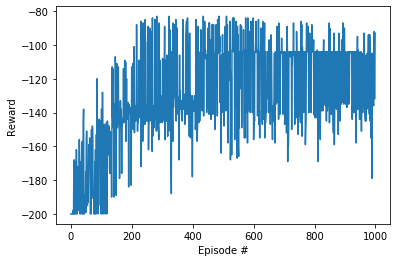

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards)), rewards)
plt.ylabel('Reward')
plt.xlabel('Episode #')
plt.show()

# Watch a smart agent

In [10]:
agent.Q.load_state_dict(torch.load('agent.pkl'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action = agent.act(transform_state(state))
        env.render()
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()